In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Путь к файлу в директории Kaggle
data_path = '/kaggle/input/songsds/dataset.csv'
sns.set(style="whitegrid")

# Загрузка данных
data = pd.read_csv(data_path)

# Проверим информацию о данных
print(data)


        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


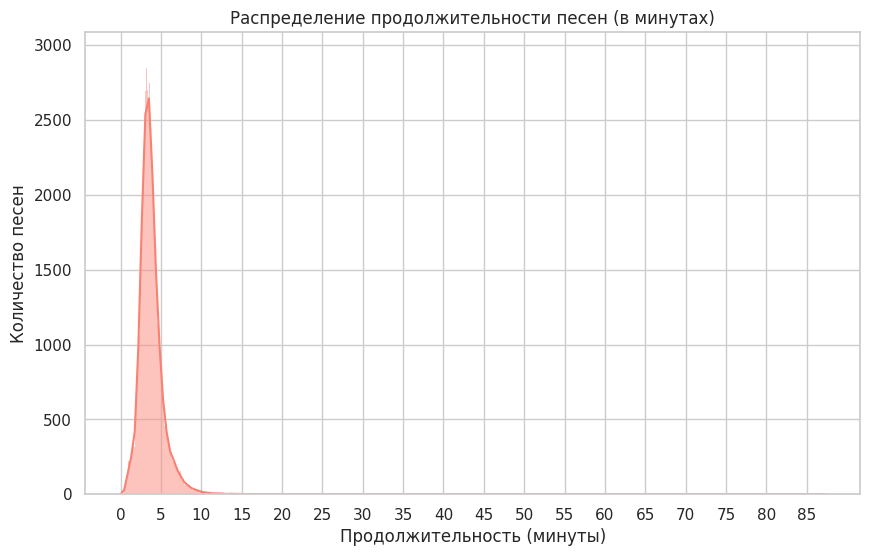

In [2]:
# 1. Распределение продолжительности песен
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_ms'] / 60000, kde=True,color="salmon")
plt.title('Распределение продолжительности песен (в минутах)')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество песен')
plt.xticks(np.arange(0, data['duration_ms'].max() / 60000 + 1, 5))
plt.show()

Вывод: Большинство песен имеют продолжительность около 3-4 минут, что типично для популярных форматов.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


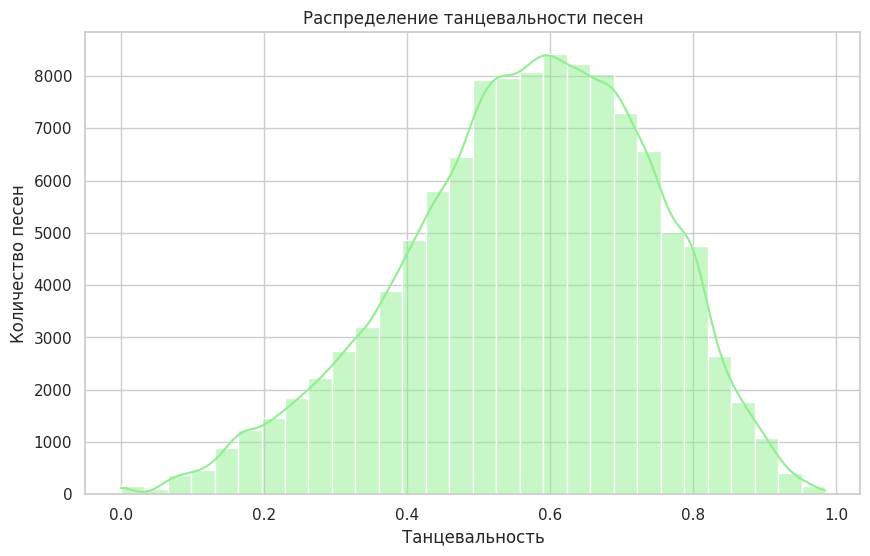

In [3]:
# 2. Распределение танцевальности
plt.figure(figsize=(10, 6))
sns.histplot(data['danceability'], kde=True, bins=30, color="lightgreen")
plt.title('Распределение танцевальности песен')
plt.xlabel('Танцевальность')
plt.ylabel('Количество песен')
plt.show()

Вывод: большинство песен имеют средний уровень танцевальности

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


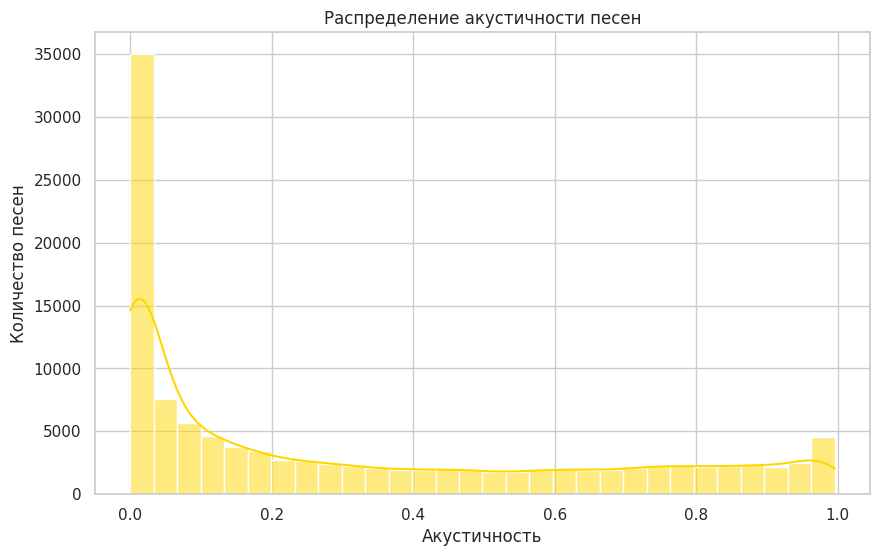

In [4]:
# 3. Распределение акустичности
plt.figure(figsize=(10, 6))
sns.histplot(data['acousticness'], kde=True, bins=30, color="gold")
plt.title('Распределение акустичности песен')
plt.xlabel('Акустичность')
plt.ylabel('Количество песен')
plt.show()

Вывод: Много песен с низкой акустичностью, что может указывать на преобладание электронных и современных жанров.

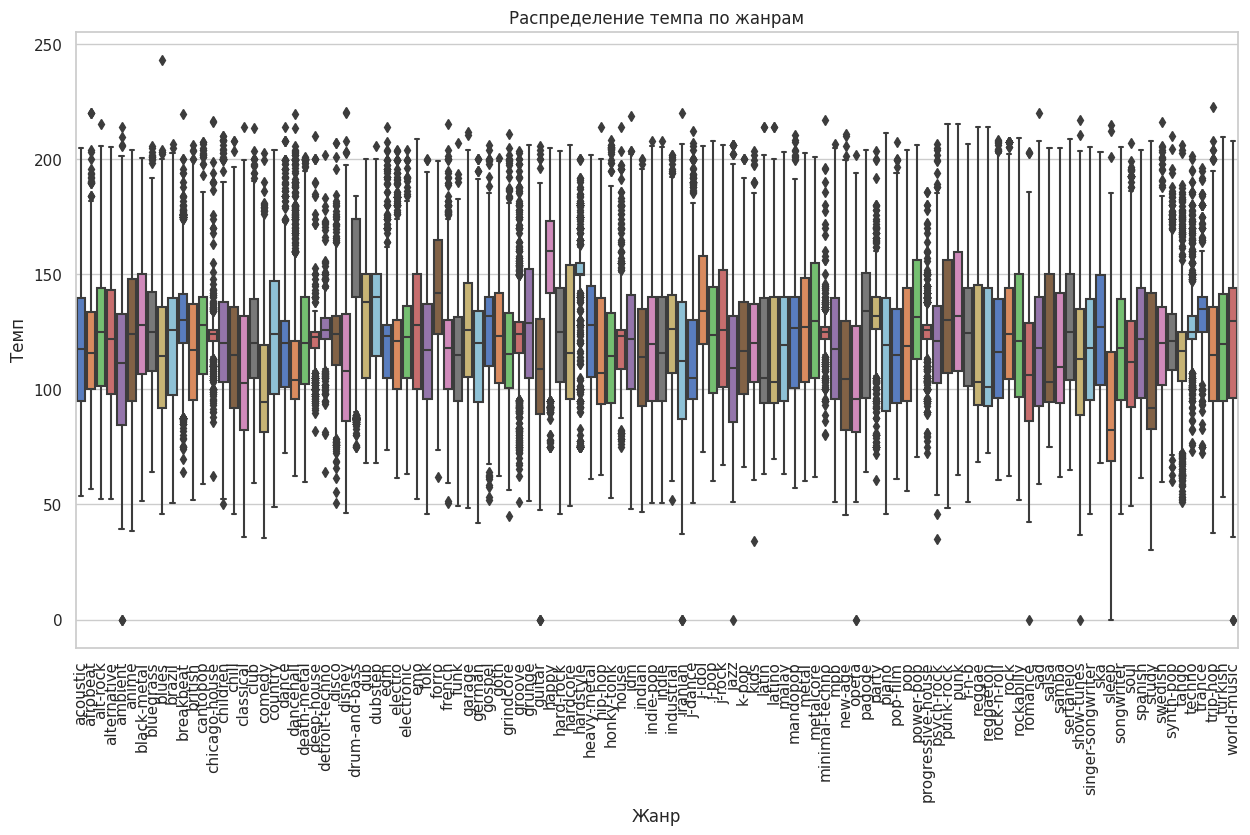

In [5]:
# 4. Темп песен по жанрам
plt.figure(figsize=(15, 8))
sns.boxplot(x='track_genre', y='tempo', data=data, palette="muted")
plt.xticks(rotation=90)
plt.title('Распределение темпа по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Темп')
plt.show()

Вывод: жанры имеют характерный темп (например, hip-hop медленнее dance/electronic).
Этот признак может помочь при классификации или кластеризации по жанрам.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


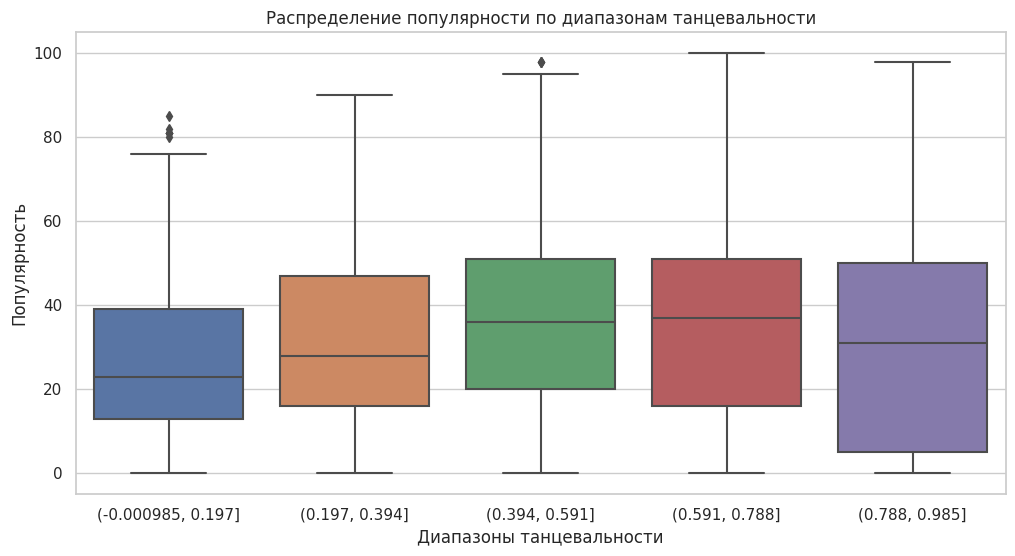

In [6]:
# 5. Разбиваем данные на диапазоны танцевальности
data['danceability_bins'] = pd.cut(data['danceability'], bins=5)

# Построение графика
plt.figure(figsize=(12, 6))
sns.boxplot(x='danceability_bins', y='popularity', data=data)
plt.title('Распределение популярности по диапазонам танцевальности')
plt.xlabel('Диапазоны танцевальности')
plt.ylabel('Популярность')
plt.show()

Вывод: Наблюдается некоторая связь между популярностью и танцевальностью: более танцевальные песни могут быть более популярны.

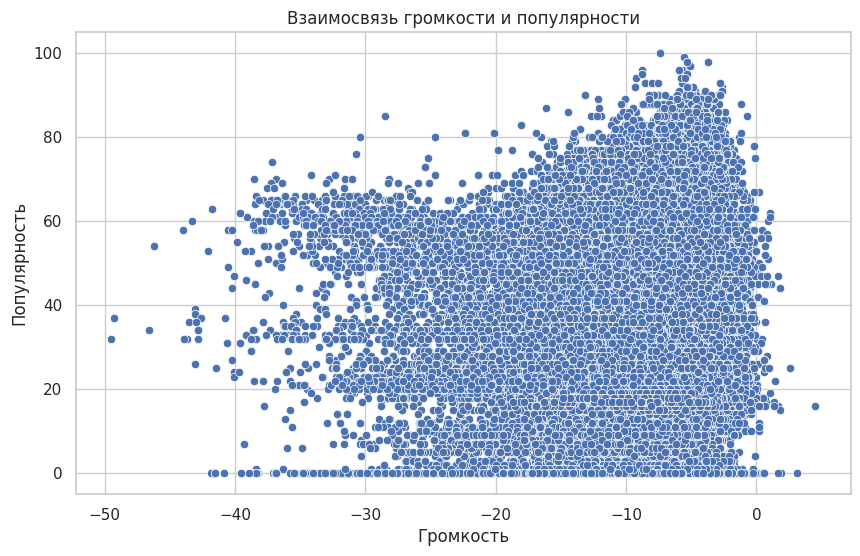

In [7]:
# 6. Взаимосвязь громкости и популярности
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=data)
plt.title('Взаимосвязь громкости и популярности')
plt.xlabel('Громкость')
plt.ylabel('Популярность')
plt.show()

Вывод:более громкие песни немного популярнее.

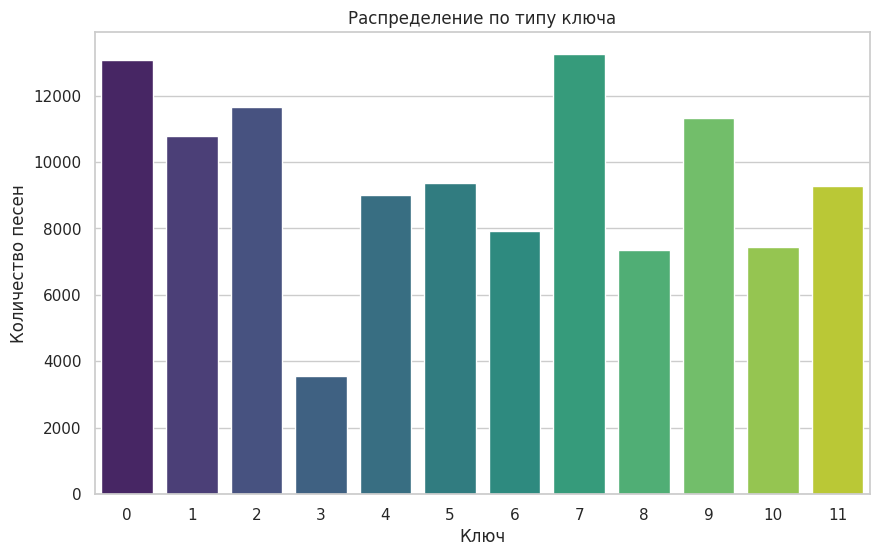

In [8]:
# 7. Распределение по типу ключа (тональности)
plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=data, palette="viridis")
plt.title('Распределение по типу ключа')
plt.xlabel('Ключ')
plt.ylabel('Количество песен')
plt.show()

Вывод: Некоторые тональности встречаются чаще других. Возможно некоторые тональности более приятны человеку и у таких тональностей больший шанс на успех


Feature engineering

In [9]:
# Преобразование громкости в нормализованный диапазон
data['loudness_norm'] = (data['loudness'] - data['loudness'].min()) / (data['loudness'].max() - data['loudness'].min())

# Отношение энергичности к танцевальности
data['energy_dance_ratio'] = data['energy'] / (data['danceability'] + 1e-9)

# Преобразование продолжительности в минуты
data['duration_min'] = data['duration_ms'] / 60000

# Перевод булевого признака explicit в числовой формат
data['is_explicit'] = data['explicit'].astype(int)

# Отношение темпа к энергичности
# Оно может помочь определить, насколько интенсивно или быстро развивается музыка в сравнении с её энергетическим уровнем.
data['tempo_energy_ratio'] = data['tempo'] / (data['energy'] + 1e-5)

# Взаимодействие танцевальности и валентности
# Этот признак может отражать, насколько "позитивно танцевальной" является музыка, комбинируя её настроение и удобство для танцев.
data['dance_valence_interaction'] = data['danceability'] * data['valence']

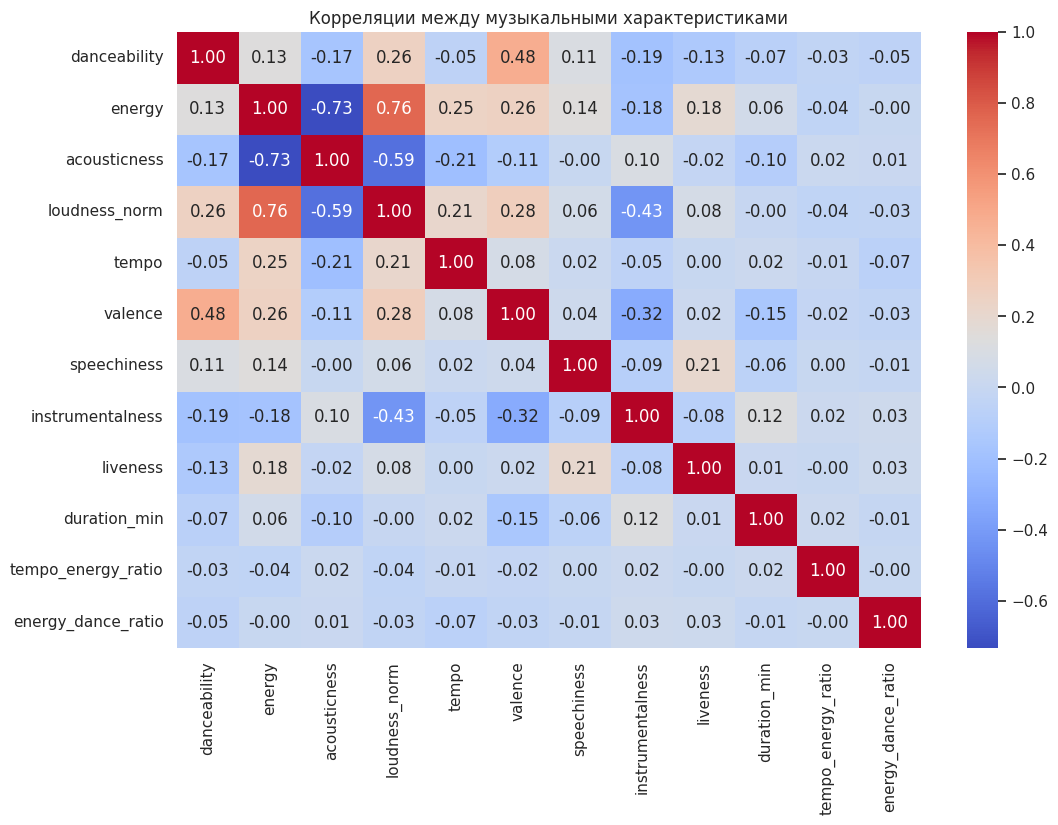

In [10]:
music_features = data[['danceability', 'energy', 'acousticness', 'loudness_norm', 
                       'tempo', 'valence', 'speechiness', 'instrumentalness', 'liveness', 'duration_min','tempo_energy_ratio',
                      'energy_dance_ratio']]

# Построение матрицы корреляции
corr_matrix = music_features.corr()

# Визуализация тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляции между музыкальными характеристиками')
plt.show()

Вывод: Если коэффициент корреляции между двумя характеристиками высок, это означает сильную линейную связь.

Громкость (loudness_norm) может быть связана с энергичностью (energy).
Громкость (loudness_norm) может быть отрицательно коррелирована с акустичностью (acousticness).


In [11]:
# --- 3. Feature Importances ---
# Выбираем фичи для модели
X = data[['danceability', 'acousticness', 'loudness_norm',
          'tempo_energy_ratio', 'speechiness', 'instrumentalness', 
          'energy_dance_ratio', 'dance_valence_interaction', 'is_explicit', 
          'duration_min']]

y = data['energy']


In [12]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Обучение модели Random Forest
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [14]:
# Создаем DataFrame для отображения важности признаков модели
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

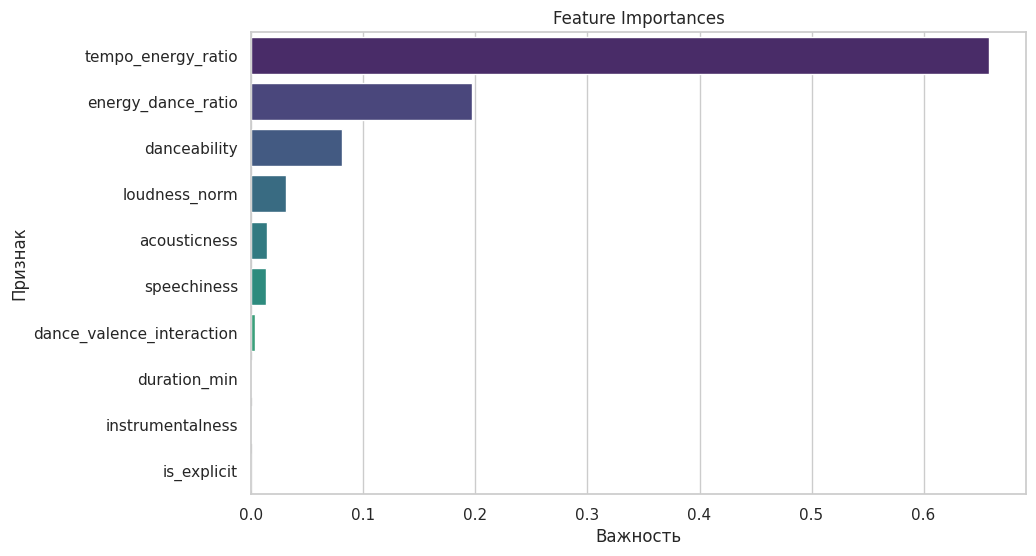

In [15]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Вывод: Наибольшее влияние на энергичность оказывают параметры tempo_energy_ratio и energy_dance_ratio

In [16]:
#  Простая модель
# Предсказания на тестовых данных
y_pred = model.predict(X_test)

In [17]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


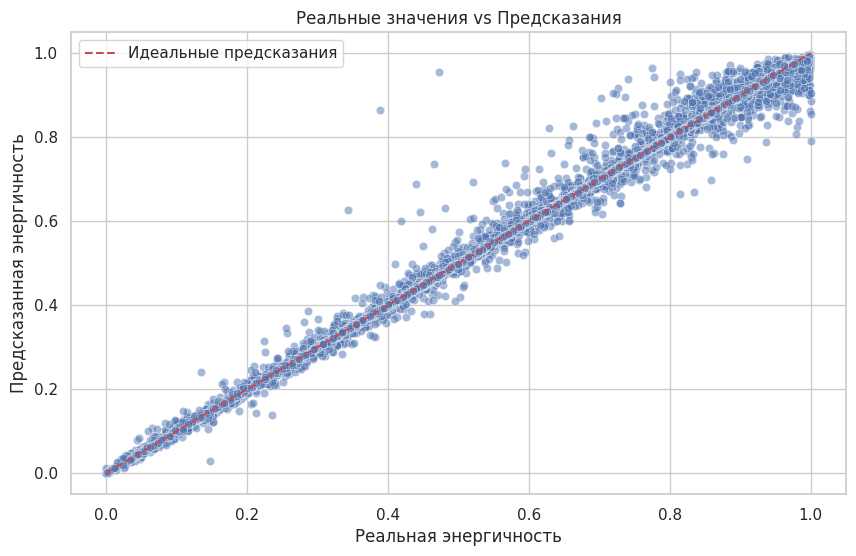

In [18]:
 
# Визуализация предсказаний
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Идеальные предсказания')
plt.title('Реальные значения vs Предсказания')
plt.xlabel('Реальная энергичность')
plt.ylabel('Предсказанная энергичность')
plt.legend()
plt.show()

Вывод: отклонения от идеальных показателей минимальны

In [19]:
#нейронная сеть
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import StandardScaler

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
#создаем и конфигурируется нейронная сеть для задачи регрессии
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Указываем форму входных данных
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Последний слой с линейной активацией для регрессии


In [22]:
# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Epoch 1/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0930 - val_loss: 0.0158
Epoch 2/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0179 - val_loss: 0.0143
Epoch 3/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0145 - val_loss: 0.0122
Epoch 4/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0137 - val_loss: 0.0111
Epoch 5/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0127 - val_loss: 0.0109
Epoch 6/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0119 - val_loss: 0.0095
Epoch 7/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0104 - val_loss: 0.0079
Epoch 8/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 9/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 10/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0091 - val_loss: 0.0072
Epoch 11/50
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 12/50
2850/2850 ━━━━━━━━

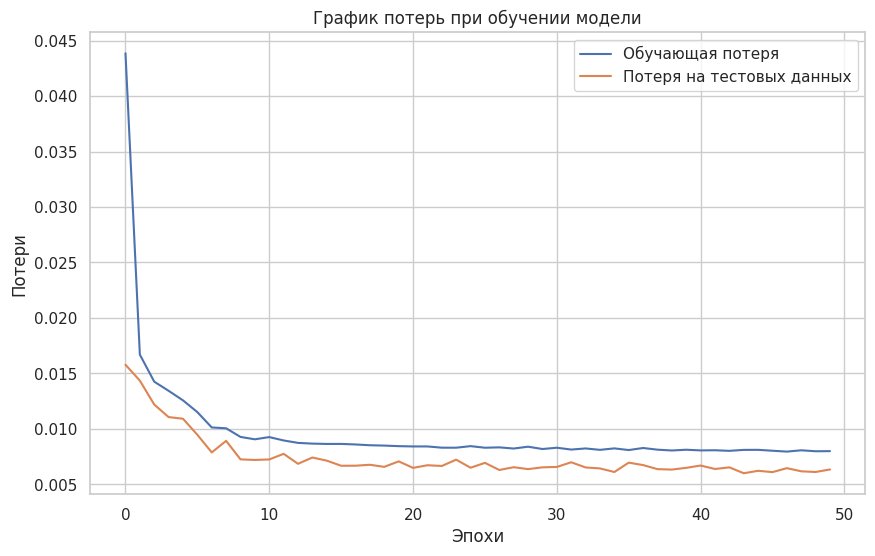

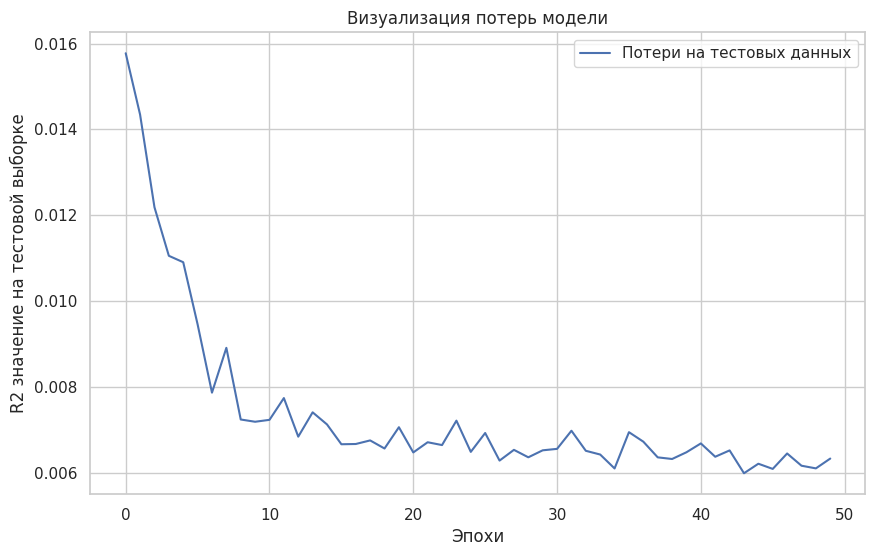

In [24]:
# График потерь
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Обучающая потеря')
plt.plot(history.history['val_loss'], label='Потеря на тестовых данных')
plt.title('График потерь при обучении модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# График R^2
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_loss'], label='Потери на тестовых данных')
plt.title('Визуализация потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('R2 значение на тестовой выборке')
plt.legend()
plt.show()

Вывод: потери пролучились минимальными,есть небольшоя скачок на 19 эпохе

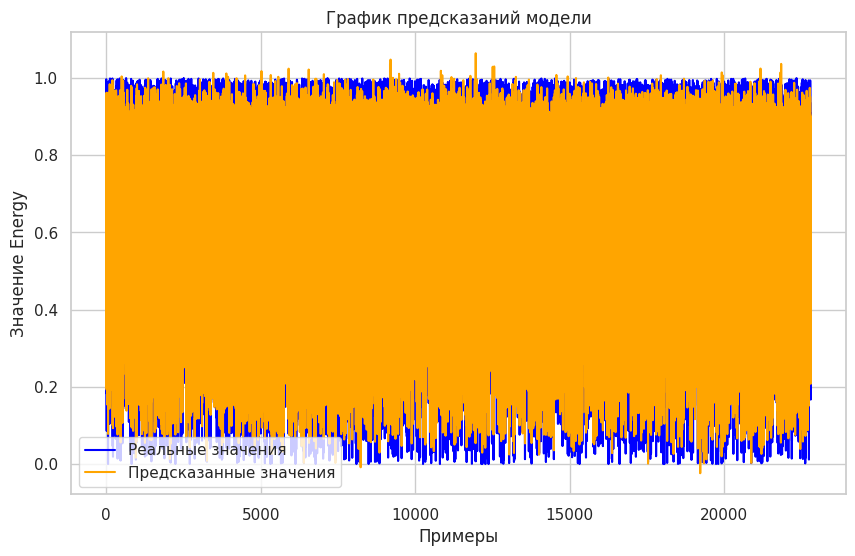

In [25]:
# График предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Реальные значения', color='blue')
plt.plot(y_pred, label='Предсказанные значения', color='orange')
plt.title('График предсказаний модели')
plt.xlabel('Примеры')
plt.ylabel('Значение Energy')
plt.legend()
plt.show()

Вывод: полученные значения модели получились близки к предсказанным

In [26]:
#модель XGBoost
import xgboost as xgb

# Обучение модели XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = xgb_model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.00
R-squared (R2): 0.99


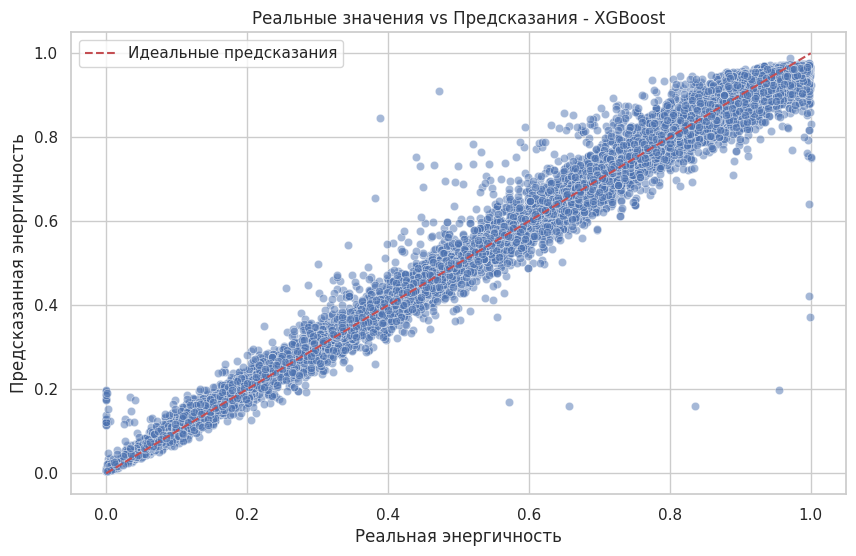

In [27]:
# Визуализация предсказаний


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Идеальные предсказания')
plt.title('Реальные значения vs Предсказания - XGBoost')
plt.xlabel('Реальная энергичность')
plt.ylabel('Предсказанная энергичность')
plt.legend()
plt.show()

вывод: модель XGBoost также отработала хорошо без особых потерь

Общий вывод: при выборе energy за таргет все выбранные модели справились хорошо